In [14]:
!pip3 install librosa

Liczba wykrytych pików R w minucie sygnału zebranego podczas odpoczynku: 94
Liczba wykrytych pików R: 94


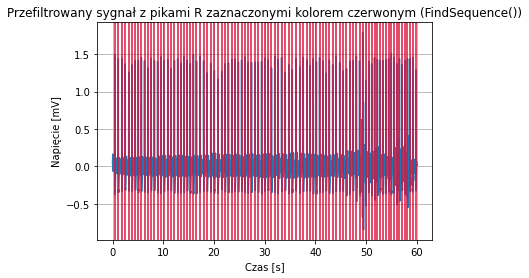

In [61]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
from scipy.signal import iirnotch
from scipy.signal import butter
from scipy.signal import lfilter, filtfilt
from  scipy.signal import find_peaks
import more_itertools as mit
import re
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

with open('ECG_data.pkl', 'rb') as f:
    data = pickle.load(f)

def FindSequence(syg, n):
  syg = list(syg)
  indexes = [syg.index(i) for i in syg if i >= 0.3]
  temp = [list(group) for group in mit.consecutive_groups(indexes)]
  result =  [group for group in temp if len(group) >= n]
  return result

rest_ekg = data[0][0]
spiders_ekg = data[0][1]

Fs = 100
T = len(rest_ekg)/Fs
dt = 1/Fs
t = np.arange(0,T,dt)

min_len = 60*Fs #długość minuty
R_peaks = FindSequence(rest_ekg, 2)
print("Liczba wykrytych pików R w minucie sygnału zebranego podczas odpoczynku:",len(R_peaks))

R = FindSequence(rest_ekg, 2)
print("Liczba wykrytych pików R:",len(R))
plt.plot(t, rest_ekg)
for i in R:
    plt.axvline(x=t[i][1],ymin=-0.5,ymax=1,color="crimson")
plt.title('Przefiltrowany sygnał z pikami R zaznaczonymi kolorem czerwonym (FindSequence())')
plt.ylabel("Napięcie [mV]")
plt.xlabel('Czas [s]')
plt.grid(True)
plt.show()

tętno (pająki): 91.5625
Liczba wykrytych pików R: 85


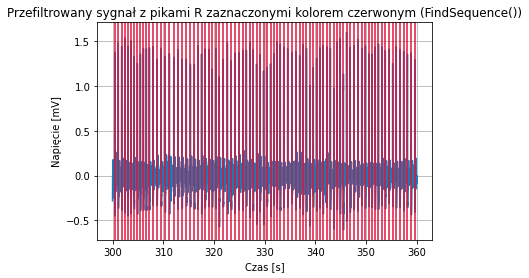

In [ ]:
Fs = 100
T2 = len(spiders_ekg)/Fs
dt = 1/Fs
t2 = np.arange(0,T2,dt)

x1 = 30000
x2 = 36000

'''
plt.plot(t2[x1:x2], spiders_ekg[x1:x2])
plt.show()
'''

all_R_peaks = FindSequence(spiders_ekg, 2)
print('tętno (pająki):', len(all_R_peaks)/(len(t2)/min_len))

syg_samp = spiders_ekg[x1:x2]
t_samp = t2[x1:x2]

R = FindSequence(syg_samp, 2)
print("Liczba wykrytych pików R:",len(R))
plt.plot(t_samp,syg_samp)
for i in R:
    plt.axvline(x=t_samp[i][1],ymin=-200,ymax=600,color="crimson")
plt.title('Przefiltrowany sygnał z pikami R zaznaczonymi kolorem czerwonym (FindSequence())')
plt.ylabel("Napięcie [mV]")
plt.xlabel('Czas [s]')
plt.grid(True)
plt.show()


In [ ]:
with open('ECG_Data.pkl', 'rb') as f:
    data = pickle.load(f)

def FindSequence(syg, n):
  syg = list(syg)
  indexes = [syg.index(i) for i in syg if i >= 0.3]
  temp = [list(group) for group in mit.consecutive_groups(indexes)]
  result =  [group for group in temp if len(group) >= n]
  return result

'''
HR = []
for item in data:
  for ar in item:
    R = FindSequence(ar, 3)
'''

rest_ekg = data[1][0]
spiders_ekg = data[1][1]

Fs = 100
T = len(rest_ekg)/Fs
dt = 1/Fs
t = np.arange(0,T,dt)

min_len = 60*Fs #długość minuty
R_peaks = FindSequence(rest_ekg, 2)
print("Liczba wykrytych pików R w minucie sygnału zebranego podczas odpoczynku:",len(R_peaks))

R = FindSequence(rest_ekg, 2)
print("Liczba wykrytych pików R:",len(R))
plt.plot(t, rest_ekg)
for i in R:
    plt.axvline(x=t[i][1],ymin=-0.5,ymax=1,color="crimson")
plt.title('Przefiltrowany sygnał z pikami R zaznaczonymi kolorem czerwonym (FindSequence())')
plt.ylabel("Napięcie [mV]")
plt.xlabel('Czas [s]')
plt.grid(True)
plt.show()

FileNotFoundError: ignored

In [ ]:
Fs = 100
T2 = len(spiders_ekg)/Fs
dt = 1/Fs
t2 = np.arange(0,T2,dt)

x1 = 30000
x2 = 36000

'''
plt.plot(t2[x1:x2], spiders_ekg[x1:x2])
plt.show()
'''

all_R_peaks = FindSequence(spiders_ekg, 2)
print('tętno (pająki):', len(all_R_peaks)/(len(t2)/min_len))

syg_samp = spiders_ekg[x1:x2]
t_samp = t2[x1:x2]

R = FindSequence(syg_samp, 2)
print("Liczba wykrytych pików R:",len(R))
plt.plot(t_samp,syg_samp)
for i in R:
    plt.axvline(x=t_samp[i][1],ymin=-200,ymax=600,color="crimson")
plt.title('Przefiltrowany sygnał z pikami R zaznaczonymi kolorem czerwonym (FindSequence())')
plt.ylabel("Napięcie [mV]")
plt.xlabel('Czas [s]')
plt.grid(True)
plt.show()

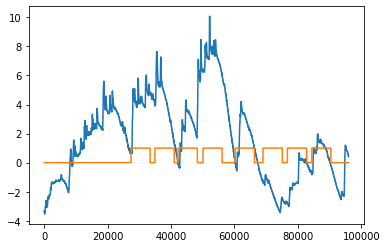

In [15]:
plt.plot(data[5][5])
plt.plot(data[5][2])

In [64]:
names = np.array(['rest', 'tag','tag','tag'])#,'tag','tag','tag'])
n = np.array(['rest', 'tag','tag','tag'])#,'tag','tag','tag'])

all_HR_tags =  np.zeros(4)
all_gsr_means =  np.zeros(4)

for i in data.keys():
  rest_ekg = data[i][0]
  fear_ekg = data[i][1]
  tags = data[i][2]
  rest_gsr = data[i][4]
  fear_gsr = data[i][5]

  Fs = 100
  dt = 1/Fs
  
  Tr = len(rest_ekg)/Fs
  tr = np.arange(0,Tr,dt)

  Tf = len(spiders_ekg)/Fs
  tf = np.arange(0,Tf,dt)

  R_peaks = FindSequence(rest_ekg, 2)
  HR_rest = len(R_peaks)/(Tr/60)

  tag = []
  Tags = []
  for item in range(len(tags)-1):
    if tags[item] == 0 and tags[item+1] != 0:
      start = item+1
    elif tags[item] != 0 and tags[item+1] == 0:
      stop = item
      Tags.append((start,stop))
  
  gsr_tags = [np.average(rest_gsr)]
  HR_tags = [HR_rest]
  for tg in Tags:
    tag_peaks = FindSequence(fear_ekg[tg[0]:tg[1]], 2)
    Tt = (tg[1]-tg[0])/Fs
    HR_tag = len(tag_peaks)/(Tt/60)
    HR_tags.append(HR_tag)
    gsr_tags.append(np.average(fear_gsr[tg[0]:tg[1]]))
  
  if len(HR_tags) >= 3 and len(gsr_tags) >= 3 and None not in gsr_tags:
    all_HR_tags = np.hstack((all_HR_tags, np.array(HR_tags[:4])))
    all_gsr_means = np.hstack((all_gsr_means, np.array(gsr_tags[:4])))
    names = np.hstack((names, n))

dataset = pd.DataFrame({
  'hr': all_HR_tags,
  'gsr': all_gsr_means,
  'name': names,
})
dataset.head()

,hr,gsr,name
0,0.0,0.000000,rest
1,0.0,0.000000,tag
2,0.0,0.000000,tag
3,0.0,0.000000,tag
4,94.0,2.794556,rest


In [65]:
from IPython.display import display, HTML

display(dataset)

,hr,gsr,name
0,0.000000,0.000000,rest
1,0.000000,0.000000,tag
2,0.000000,0.000000,tag
3,0.000000,0.000000,tag
4,94.000000,2.794556,rest
...,...,...,...
227,71.815052,2.603097,tag
228,91.000000,-8.060335,rest
229,87.555337,-3.578920,tag
230,87.555337,-2.408374,tag


In [68]:
n_neighbors = 6

X=dataset[['hr', 'gsr']] 
y=dataset['name']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) #70% training and 30% test

#Create a Gaussian Classifier
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(y_pred)

result = [1 if i == 'tag' else 0 for i in y_pred]
paintings = np.zeros(len(result))
for i in range(len(paintings)):
  if result[i] == 'tag':
    paintings[i] = np.random.choice([4,5,6,11,12,13,15,16,17,20,21])

print(result)
print(paintings)

Accuracy: 0.6774193548387096
['tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag'
 'rest' 'tag' 'tag' 'tag' 'tag' 'tag' 'rest' 'tag' 'tag' 'tag' 'tag' 'tag'
 'rest' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag'
 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'rest' 'tag' 'tag'
 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'rest' 'tag' 'tag'
 'rest' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'rest'
 'rest' 'tag' 'tag' 'tag' 'tag' 'tag' 'tag' 'rest' 'tag' 'rest' 'rest'
 'tag' 'tag' 'tag' 'rest' 'tag' 'rest' 'tag' 'rest' 'tag' 'tag' 'tag']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:

'''
HR = []
for item in data:
  for ar in item:
    R = FindSequence(ar, 3)
'''

rest_ekg = data[11][0]
spiders_ekg = data[11][1]

Fs = 100
T = len(rest_ekg)/Fs
dt = 1/Fs
t = np.arange(0,T,dt)

min_len = 60*Fs #długość minuty
R_peaks = FindSequence(rest_ekg, 2)
print("Liczba wykrytych pików R w minucie sygnału zebranego podczas odpoczynku:",len(R_peaks))

R = FindSequence(rest_ekg, 2)
print("Liczba wykrytych pików R:",len(R))
plt.plot(t, rest_ekg)
for i in R:
    plt.axvline(x=t[i][1],ymin=-0.5,ymax=1,color="crimson")
plt.title('Przefiltrowany sygnał z pikami R zaznaczonymi kolorem czerwonym (FindSequence())')
plt.ylabel("Napięcie [mV]")
plt.xlabel('Czas [s]')
plt.grid(True)
plt.show()